In [1]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import seaborn
import matplotlib.pyplot as plt 

In [3]:
df_freelancer_raw = pd.read_csv('input/FreeLancerT.csv')
df_freelancer_raw

,Country,CountryCode,Continent,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,Aruba,ABW,NaN,1.918226,NaN,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,Angola,AGO,AF,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,Albania,ALB,EU,7.783173,0.241072,NaN,0.551021,6.956642,0.241072,12.397975,0.860970
3,Andorra,AND,EU,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,United Arab Emirates,ARE,AS,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...,...,...,...
185,Vanuatu,VUT,OC,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,Samoa,WSM,OC,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,Yemen Rep.,YEM,AS,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,South Africa,ZAF,AF,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


Cleanup date --> Inlocuire valori numerice nan cu media

In [4]:
df_freelancer_numerical = df_freelancer_raw.iloc[:, 3:]
for column in df_freelancer_numerical.columns:
    if is_numeric_dtype(df_freelancer_numerical[column]) and df_freelancer_numerical[column].isna().any():
        df_freelancer_numerical[column].fillna(df_freelancer_numerical[column].mean(), inplace=True)
df_freelancer_numerical

/run/user/1000/ipykernel_19213/2130309872.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_freelancer_numerical[column].fillna(df_freelancer_numerical[column].mean(), inplace=True)


,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,1.918226,0.140219,4.795565,0.959113,2.877339,0.000000,3.836452,0.000000
1,0.023228,0.003871,0.011614,0.000000,0.023228,0.000000,0.019357,0.000000
2,7.783173,0.241072,4.593976,0.551021,6.956642,0.241072,12.397975,0.860970
3,7.229090,0.000000,7.229090,1.445818,10.120726,0.000000,8.674908,1.445818
4,7.176023,0.291357,7.996140,0.291357,4.478270,0.140283,7.629246,0.151074
...,...,...,...,...,...,...,...,...
185,0.739454,0.000000,0.369727,0.000000,0.369727,0.000000,0.739454,0.000000
186,4.112624,0.000000,2.570390,0.514078,4.626702,0.000000,3.598546,0.514078
187,0.080065,0.000000,0.076426,0.007279,0.043672,0.000000,0.058229,0.003639
188,1.109516,0.027283,1.227744,0.023645,0.836685,0.030921,1.113154,0.040015


### 0_ Varianta componente 

In [5]:
scaler = StandardScaler()
df_freelancer_scaled = pd.DataFrame(scaler.fit_transform(df_freelancer_numerical), columns=df_freelancer_numerical.columns)
df_freelancer_scaled

,C,C_Test,Html,Html_test,Java,Java_test,PHP,PHP_test
0,-0.210758,8.308614e-17,0.028161,0.197016,-0.107550,-0.468369,-0.151652,-0.196686
1,-0.353704,-4.081568e-01,-0.640136,-0.179024,-0.557956,-0.468369,-0.681605,-0.196686
2,0.231656,3.019011e-01,0.000000,0.037015,0.536203,0.162512,1.037001,0.133040
3,0.189860,-4.197456e-01,0.368114,0.387838,1.035526,-0.468369,0.520103,0.357019
4,0.185857,4.524307e-01,0.475267,-0.064791,0.145092,-0.101250,0.374927,-0.138829
...,...,...,...,...,...,...,...,...
185,-0.299677,-4.197456e-01,-0.590109,-0.179024,-0.503275,-0.468369,-0.581629,-0.196686
186,-0.045226,-4.197456e-01,-0.282686,0.022531,0.168516,-0.468369,-0.184682,0.000191
187,-0.349416,-4.197456e-01,-0.631082,-0.176170,-0.554730,-0.468369,-0.676208,-0.195292
188,-0.271761,-3.380735e-01,-0.470248,-0.169753,-0.429585,-0.387449,-0.529745,-0.181361


In [6]:
n = df_freelancer_scaled.shape[0]
m = df_freelancer_scaled.shape[1]
print(f"{n} linii si {m} coloane")

190 linii si 8 coloane


### 1_ Calcul varianta componente

In [7]:
pca = PCA()
pca.fit(df_freelancer_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance_cum = np.cumsum(explained_variance)
print("Varianta pe componente procentual(%): ")
print(f'Varianta pe componente: {explained_variance}\nVarianta pe componente cumulata: {explained_variance_cum}')
print("Varianta pe componente absoluta(abs): ")
print(f'Varianta pe componente: {explained_variance*(n-1)/n}\nVarianta pe componente cumulata: {explained_variance_cum*(n-1)/n}')


Varianta pe componente procentual(%): 
Varianta pe componente: [6.59781658e-01 2.35728127e-01 4.90572825e-02 3.56152317e-02
 1.16125362e-02 4.98159589e-03 2.59393907e-03 6.29629865e-04]
Varianta pe componente cumulata: [0.65978166 0.89550978 0.94456707 0.9801823  0.99179484 0.99677643
 0.99937037 1.        ]
Varianta pe componente absoluta(abs): 
Varianta pe componente: [6.56309123e-01 2.34487453e-01 4.87990863e-02 3.54277831e-02
 1.15514176e-02 4.95537696e-03 2.58028676e-03 6.26316023e-04]
Varianta pe componente cumulata: [0.65630912 0.89079658 0.93959566 0.97502344 0.98657486 0.99153024
 0.99411053 0.99473684]


### 2_ Calcul corelatii variabile observate - componente
Componentele sunt defapt scoruri
Scorurile sunt componentele principale care sunt aplicate pe datele introduse

In [8]:
components = pca.transform(df_freelancer_scaled)
components = pd.DataFrame(pca.transform(df_freelancer_scaled), df_freelancer_scaled.index, ["C" + str(i) for i in range(m)])
components


,C0,C1,C2,C3,C4,C5,C6,C7
0,-0.287639,-0.177674,-0.343975,0.088469,-0.046247,0.240804,-0.174384,0.213687
1,-1.225225,-0.453536,0.039651,0.226486,-0.086667,-0.000584,-0.010200,-0.011092
2,0.885213,0.289122,-0.218270,-0.305579,0.287806,-0.631162,-0.074026,0.241421
3,0.888504,-0.660004,-0.383869,-0.701948,0.295477,0.023153,-0.484474,-0.011074
4,0.473320,0.400290,-0.461669,-0.052866,0.123218,0.134755,0.146732,0.073429
...,...,...,...,...,...,...,...,...
185,-1.127658,-0.443622,0.004857,0.147977,-0.069879,-0.022494,0.011915,0.006181
186,-0.339144,-0.570300,-0.110033,-0.178689,0.179102,-0.016392,-0.154526,-0.001917
187,-1.218184,-0.458669,0.039712,0.213400,-0.091607,0.002709,-0.008837,-0.011177
188,-0.971552,-0.345854,0.005831,0.136596,-0.056836,0.022390,0.006420,-0.016927


In [9]:
#Cadranul dreapta sus din matricea totala de corelatii 
corr_mat = np.corrcoef(df_freelancer_scaled, components, rowvar=False)[:m,m:]
print(f'{df_freelancer_scaled.shape} + {components.shape}')
df_corr = pd.DataFrame(corr_mat, df_freelancer_scaled.columns, ["Comp" + str(i+1) for i in range(components.shape[1])])
df_corr

(190, 8) + (190, 8)


,Comp1,Comp2,Comp3,Comp4,Comp5,Comp6,Comp7,Comp8
C,0.887939,-0.436691,0.037853,0.005981,0.071273,0.006500,0.119419,0.003733
C_Test,0.593289,0.674108,-0.187286,0.390274,0.078635,-0.001776,0.000684,0.002950
Html,0.875333,0.383519,-0.182143,-0.158349,-0.106187,0.129799,0.006160,-0.017143
Html_test,0.824534,-0.527654,0.089337,0.139983,-0.089924,0.047078,-0.042505,0.045151
Java,0.944902,-0.178840,0.052454,-0.141682,0.218706,0.019391,-0.063714,-0.009113
Java_test,0.552312,0.648299,0.522434,-0.008387,-0.037869,-0.012668,0.007012,-0.003014
PHP,0.876188,0.356210,-0.197738,-0.220433,-0.044703,-0.123024,-0.000825,0.024150
PHP_test,0.852154,-0.485837,-0.001851,0.138448,-0.104930,-0.071216,-0.023158,-0.044794


### 3_ Trasare corelograma corelatii factoriale 

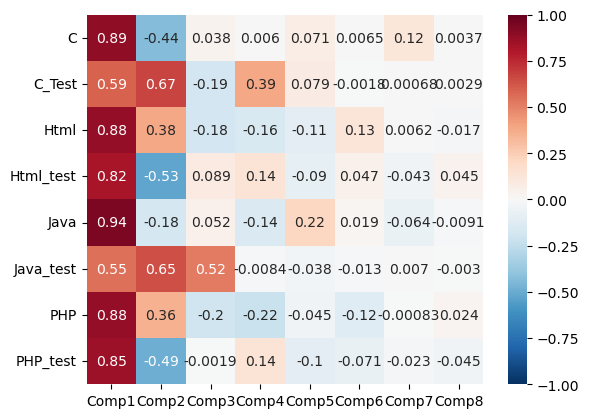

In [10]:
map = seaborn.heatmap(
    df_corr,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    annot=True
    )

### 4_ Plot varianta componente
Nu am pus inca criteriile...

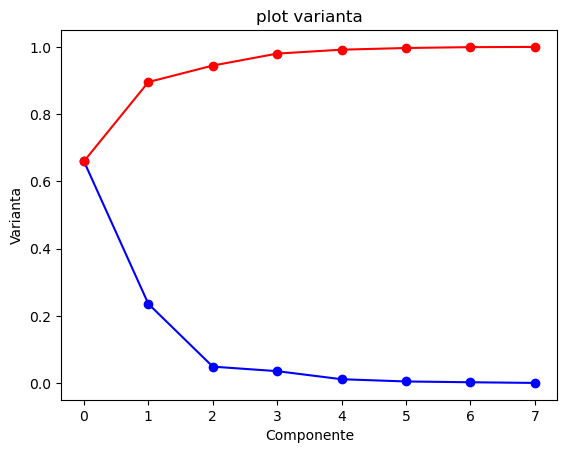

In [11]:
plt.plot(range(len(explained_variance)), explained_variance, 'bo-')
plt.plot(explained_variance_cum, 'ro-')
plt.ylabel("Varianta")
plt.xlabel("Componente")
plt.title("plot varianta")
plt.show()

### 5_ Calcul componente si/sau scoruri

In [12]:
#Componente:
print(f'Componentele sunt:\n {pca.components_}\n\nScorurile sunt: {pca.transform(df_freelancer_scaled)}')


Componentele sunt:
 [[ 0.38648971  0.25823878  0.38100271  0.3588919   0.41128397  0.24040279
   0.38137515  0.3709137 ]
 [-0.31799753  0.49088426  0.27927748 -0.38423634 -0.13023101  0.47208952
   0.25939143 -0.35378553]
 [ 0.06042242 -0.29895661 -0.29074712  0.14260543  0.0837309   0.83393954
  -0.31564082 -0.00295474]
 [ 0.01120555  0.73115007 -0.29665595  0.26224835 -0.26543061 -0.01571151
  -0.41296545  0.25937298]
 [ 0.23383841  0.25799352 -0.34838858 -0.29503147  0.71754883 -0.12424383
  -0.14666521 -0.3442633 ]
 [ 0.03255912 -0.00889715  0.65019425  0.23582507  0.09713571 -0.06345566
  -0.61625703 -0.35673523]
 [ 0.82898697  0.00475119  0.04276377 -0.29506182 -0.44229156  0.04867446
  -0.00573046 -0.16076052]
 [ 0.05260178  0.04156341 -0.24155014  0.63618395 -0.12840408 -0.04246898
   0.34026939 -0.63115336]]

Scorurile sunt: [[-2.87639406e-01 -1.77673799e-01 -3.43974767e-01 ...  2.40804302e-01
  -1.74383569e-01  2.13686937e-01]
 [-1.22522469e+00 -4.53535618e-01  3.96512082e-02

### 6_ Plot scoruri??

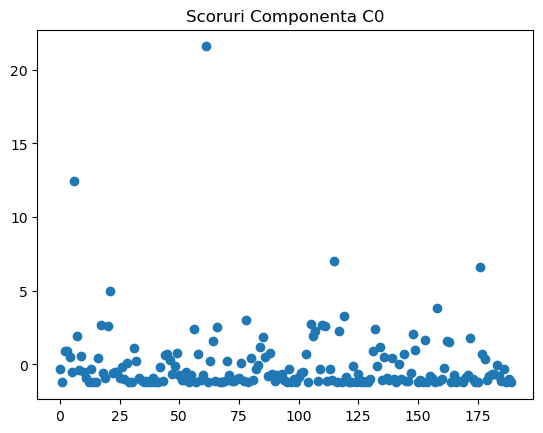

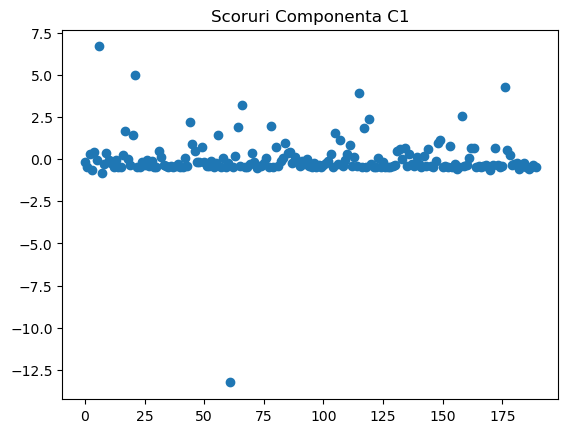

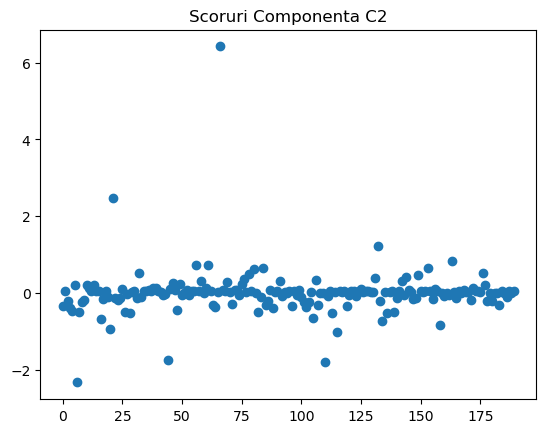

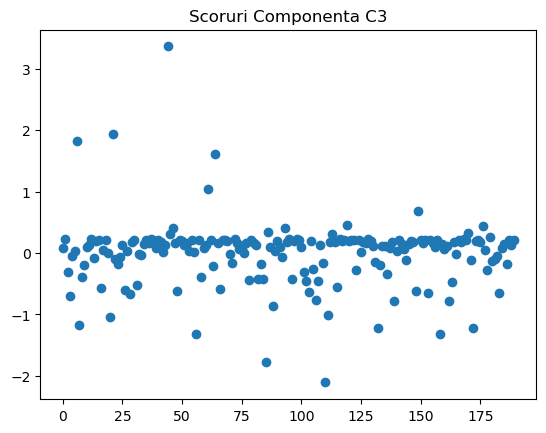

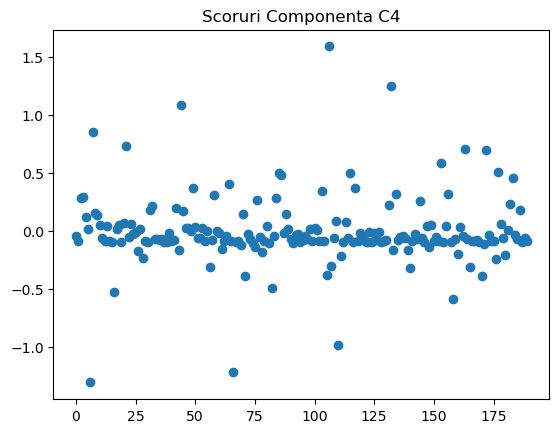

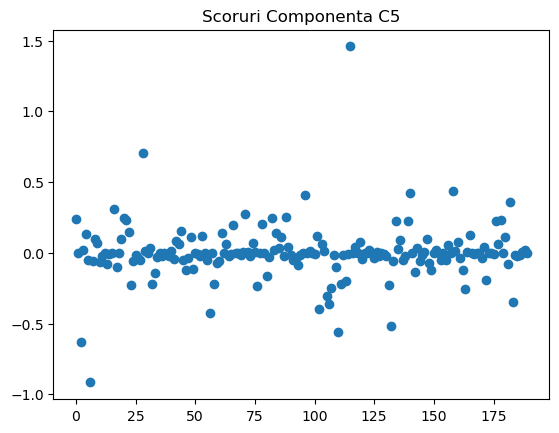

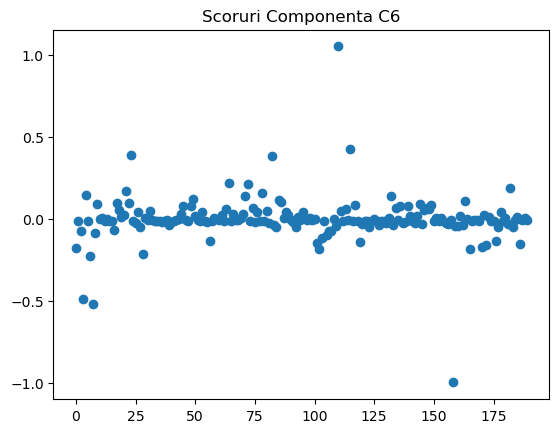

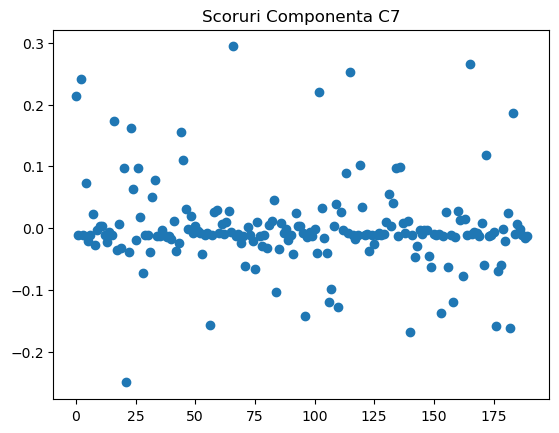

In [13]:
for component in components.columns:
    plt.title(f'Scoruri Componenta {component}')
    plt.plot(components[component], 'o')
    plt.show()

### 7_ Calcul cosinusuri 
- Cosinusurile se calculeaza cu formula:
   - Fiecare element din matricea transpusa impartit la suma pe coloane din matricea normala

In [14]:
comp2 = components * components
cosin = (comp2.T / np.sum(comp2, axis=1)).T
cosin

,C0,C1,C2,C3,C4,C5,C6,C7
0,0.219666,0.083813,0.314137,0.020780,0.005678,1.539550e-01,0.080738,0.121233
1,0.849333,0.116378,0.000890,0.029022,0.004250,1.931255e-07,0.000059,0.000070
2,0.504516,0.053820,0.030674,0.060121,0.053331,2.564844e-01,0.003528,0.037526
3,0.360835,0.199106,0.067353,0.225216,0.039906,2.450126e-04,0.107283,0.000056
4,0.339205,0.242606,0.322712,0.004232,0.022988,2.749436e-02,0.032599,0.008164
...,...,...,...,...,...,...,...,...
185,0.850064,0.131560,0.000016,0.014638,0.003264,3.382521e-04,0.000095,0.000026
186,0.212790,0.601715,0.022399,0.059071,0.059345,4.971240e-04,0.044176,0.000007
187,0.847951,0.120211,0.000901,0.026021,0.004795,4.191936e-06,0.000045,0.000071
188,0.868941,0.110114,0.000031,0.017176,0.002974,4.614992e-04,0.000038,0.000264


In [15]:
comp2.T

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
C0,0.082736,1.501176e+00,0.783601,0.789439,0.224031,0.280114,154.676315,3.578759,0.159869,0.288160,...,0.653758,0.397201,0.431073,0.000239,0.578124,1.271613,0.115018,1.483973,0.943913,1.458534
C1,0.031568,2.056946e-01,0.083591,0.435606,0.160232,0.004321,44.590826,0.718312,0.091189,0.139953,...,0.067459,0.054464,0.308694,0.114079,0.055359,0.196800,0.325242,0.210377,0.119615,0.206998
C2,0.118319,1.572218e-03,0.047642,0.147356,0.213138,0.042853,5.463974,0.244964,0.061724,0.035825,...,0.042871,0.000050,0.000244,0.105110,0.002349,0.000024,0.012107,0.001577,0.000034,0.001203
C3,0.007827,5.129582e-02,0.093378,0.492731,0.002795,0.001201,3.304183,1.383445,0.147013,0.038480,...,0.015338,0.011042,0.002090,0.424003,0.005541,0.021897,0.031930,0.045539,0.018658,0.041714
C4,0.002139,7.511211e-03,0.082832,0.087307,0.015183,0.000329,1.710741,0.732377,0.024333,0.018114,...,0.042140,0.000031,0.054723,0.211365,0.000978,0.004883,0.032077,0.008392,0.003230,0.007880
C5,0.057987,3.413448e-07,0.398365,0.000536,0.018159,0.002498,0.839738,0.003205,0.009312,0.004394,...,0.012731,0.006138,0.131032,0.123098,0.000317,0.000506,0.000269,0.000007,0.000501,0.000002
C6,0.030410,1.040355e-04,0.005480,0.234715,0.021530,0.000128,0.050326,0.265507,0.007494,0.008098,...,0.000008,0.001075,0.035954,0.002286,0.000040,0.000142,0.023878,0.000078,0.000041,0.000088
C7,0.045662,1.230390e-04,0.058284,0.000123,0.005392,0.000431,0.000131,0.000509,0.000787,0.000011,...,0.000416,0.000603,0.026240,0.034413,0.000108,0.000038,0.000004,0.000125,0.000287,0.000166


### 8_ Contributii

In [16]:
contrib = comp2 * 100 / np.sum(comp2, axis = 0)
contrib


,C0,C1,C2,C3,C4,C5,C6,C7
0,0.008250,0.008810,0.158674,0.014458,0.012117,0.765802,0.771272,4.771194
1,0.149688,0.057407,0.002108,0.094755,0.042554,0.000005,0.002639,0.012856
2,0.078136,0.023330,0.063891,0.172491,0.469277,5.261009,0.138982,6.090043
3,0.078718,0.121573,0.197615,0.910187,0.494626,0.007079,5.953034,0.012813
4,0.022339,0.044719,0.285834,0.005163,0.086015,0.239816,0.546069,0.563384
...,...,...,...,...,...,...,...,...
185,0.126798,0.054925,0.000032,0.040449,0.027664,0.006682,0.003601,0.003993
186,0.011469,0.090772,0.016237,0.058981,0.181731,0.003549,0.605622,0.000384
187,0.147973,0.058714,0.002115,0.084122,0.047543,0.000097,0.001981,0.013054
188,0.094121,0.033383,0.000046,0.034466,0.018301,0.006621,0.001045,0.029938


### 9_ Comunalitati

In [17]:
comunalitati = np.cumsum(corr_mat, axis=1)
comunalitati

array([[0.88793882, 0.45124762, 0.48910014, 0.49508145, 0.56635434,
        0.57285417, 0.69227294, 0.69600619],
       [0.59328938, 1.26739787, 1.08011205, 1.47038586, 1.54902112,
        1.54724497, 1.54792939, 1.55087924],
       [0.87533275, 1.25885151, 1.07670864, 0.91835942, 0.81217215,
        0.94197145, 0.94813174, 0.93098842],
       [0.82453438, 0.2968805 , 0.38621779, 0.52620091, 0.43627664,
        0.48335477, 0.44084998, 0.48600129],
       [0.94490228, 0.76606209, 0.81851656, 0.67683482, 0.89554046,
        0.91493182, 0.85121802, 0.84210491],
       [0.55231218, 1.20061074, 1.72304458, 1.71465808, 1.67678912,
        1.66412137, 1.67113311, 1.668119  ],
       [0.8761884 , 1.23239857, 1.03466068, 0.81422768, 0.76952479,
        0.64650043, 0.64567493, 0.66982456],
       [0.8521538 , 0.3663166 , 0.36446557, 0.50291386, 0.39798396,
        0.32676834, 0.30361017, 0.25881589]])

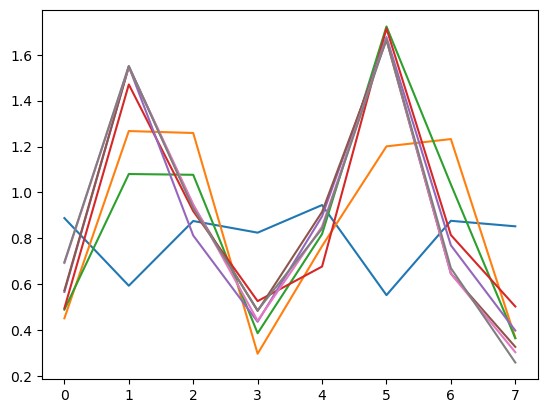

In [18]:
plt.plot(comunalitati)